In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats  import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [31]:
conn = sqlite3.connect('/content/drive/MyDrive/Project/inventory.db')
df = pd.read_sql_query(" select * from vendor_sale_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,3960.0,DIAGEO NORTH AMERICA INC,4261.0,Capt Morgan Spiced Rum,16.17,22.99,1750.0,16507.0,266918.19,2974.0,65398.26,21.990000,5464.51,257032.07,-201519.93,-308.142648,0.180166,0.245012
1,1128.0,BROWN-FORMAN CORP,1233.0,Jack Daniels No 7 Black,26.27,36.99,1750.0,8385.0,220273.95,1440.0,51825.60,35.990000,2645.68,68601.68,-168448.35,-325.029233,0.171735,0.235278
2,3960.0,DIAGEO NORTH AMERICA INC,3102.0,Smirnoff Traveler,12.94,17.99,1750.0,16461.0,213005.34,821.0,14769.79,17.990000,1508.41,257032.07,-198235.55,-1342.169049,0.049875,0.069340
3,480.0,BACARDI USA INC,4227.0,Bacardi Superior Rum Trav,14.17,17.99,1750.0,15012.0,212720.04,1515.0,27254.85,17.990000,2783.57,89286.27,-185465.19,-680.485088,0.100919,0.128125
4,3960.0,DIAGEO NORTH AMERICA INC,3545.0,Ketel One Vodka,21.89,29.99,1750.0,9674.0,211763.86,1573.0,47408.27,30.177726,2890.18,257032.07,-164355.59,-346.681265,0.162601,0.223873


In [32]:
# summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,5098.0,9.142303e+03,15624.385125,105.00,3252.000000,6355.000000,9552.000000,173357.000000
Brand,5098.0,1.676224e+04,13486.942141,58.00,4504.750000,14369.500000,24866.000000,90086.000000
PurchasePrice,5098.0,1.498097e+01,81.241871,0.38,6.490000,9.200000,14.810000,5681.810000
ActualPrice,5098.0,2.200640e+01,107.518804,0.49,9.990000,13.990000,21.990000,7499.990000
Volume,5098.0,8.988601e+02,689.221501,50.00,750.000000,750.000000,750.000000,18000.000000
TotalPurchaseQuantity,5098.0,3.622723e+02,1014.612303,1.00,24.000000,95.000000,308.000000,24057.000000
TotalPurchaseDollars,5098.0,3.326402e+03,10473.909067,0.71,295.577500,1039.710000,2911.752500,266918.190000
TotalSalesQuantity,5098.0,6.689898e+01,183.409944,0.00,2.000000,15.000000,59.000000,4022.000000
TotalSalesDollars,5098.0,8.577771e+02,2459.157803,0.00,28.237500,239.965000,806.257500,65398.260000
TotalSalesPrice,5098.0,1.513391e+01,18.277661,0.00,4.992066,11.990000,18.861212,349.990000


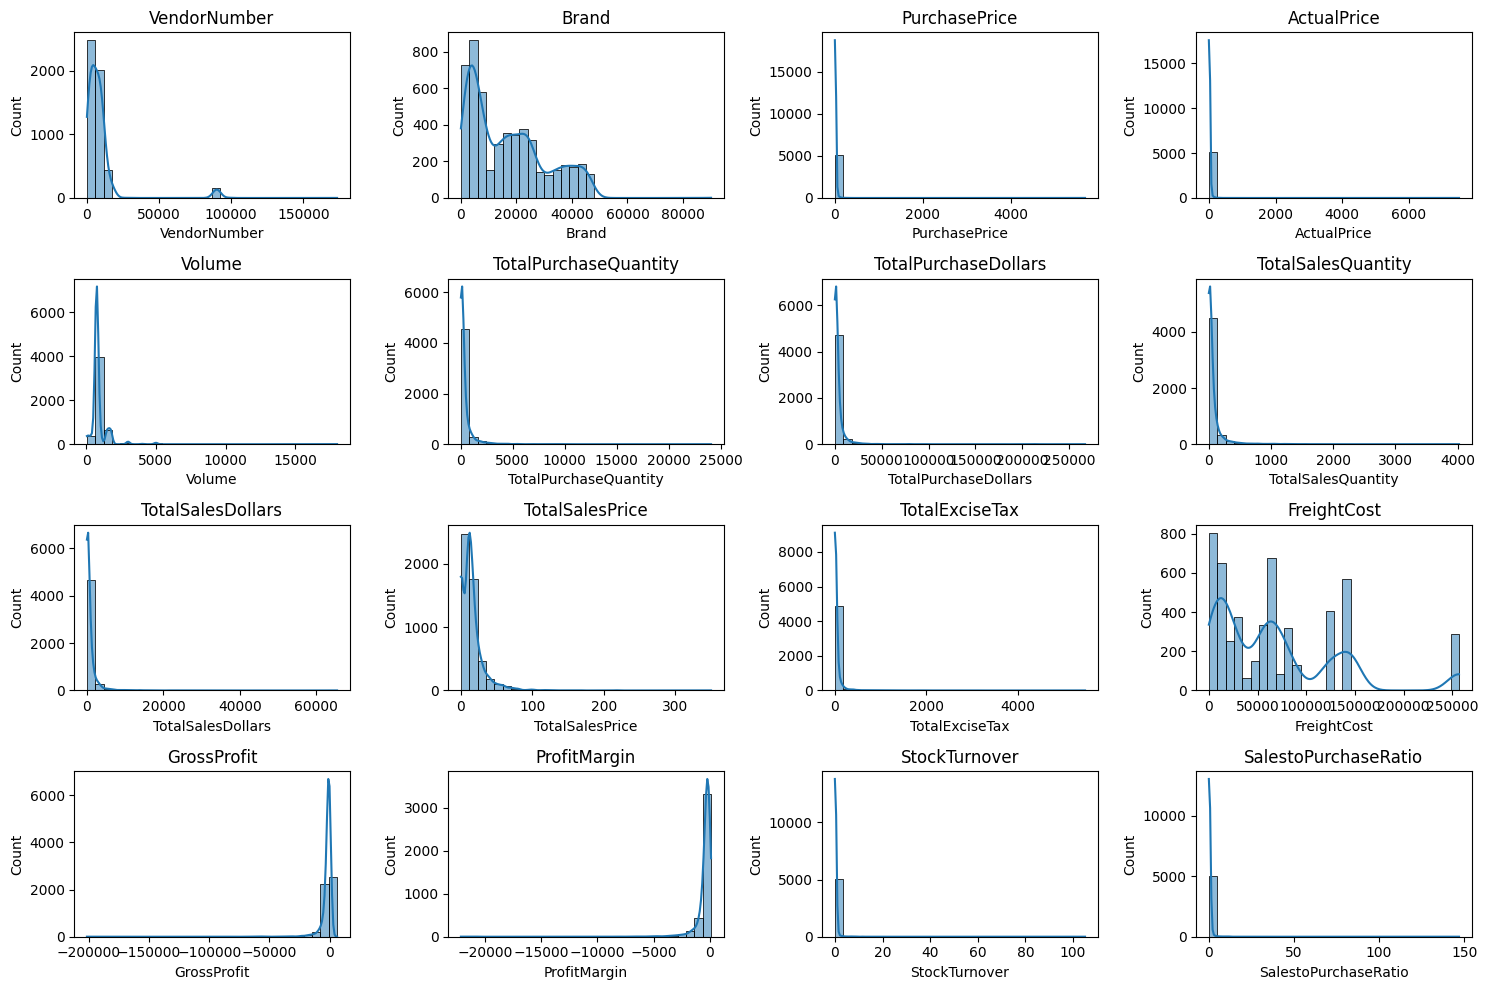

In [33]:
numericalcols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numericalcols):
  plt.subplot(4,4,i+1)
  sns.histplot(df[col],kde=True,bins=30)
  plt.title(col)
plt.tight_layout()
plt.show()

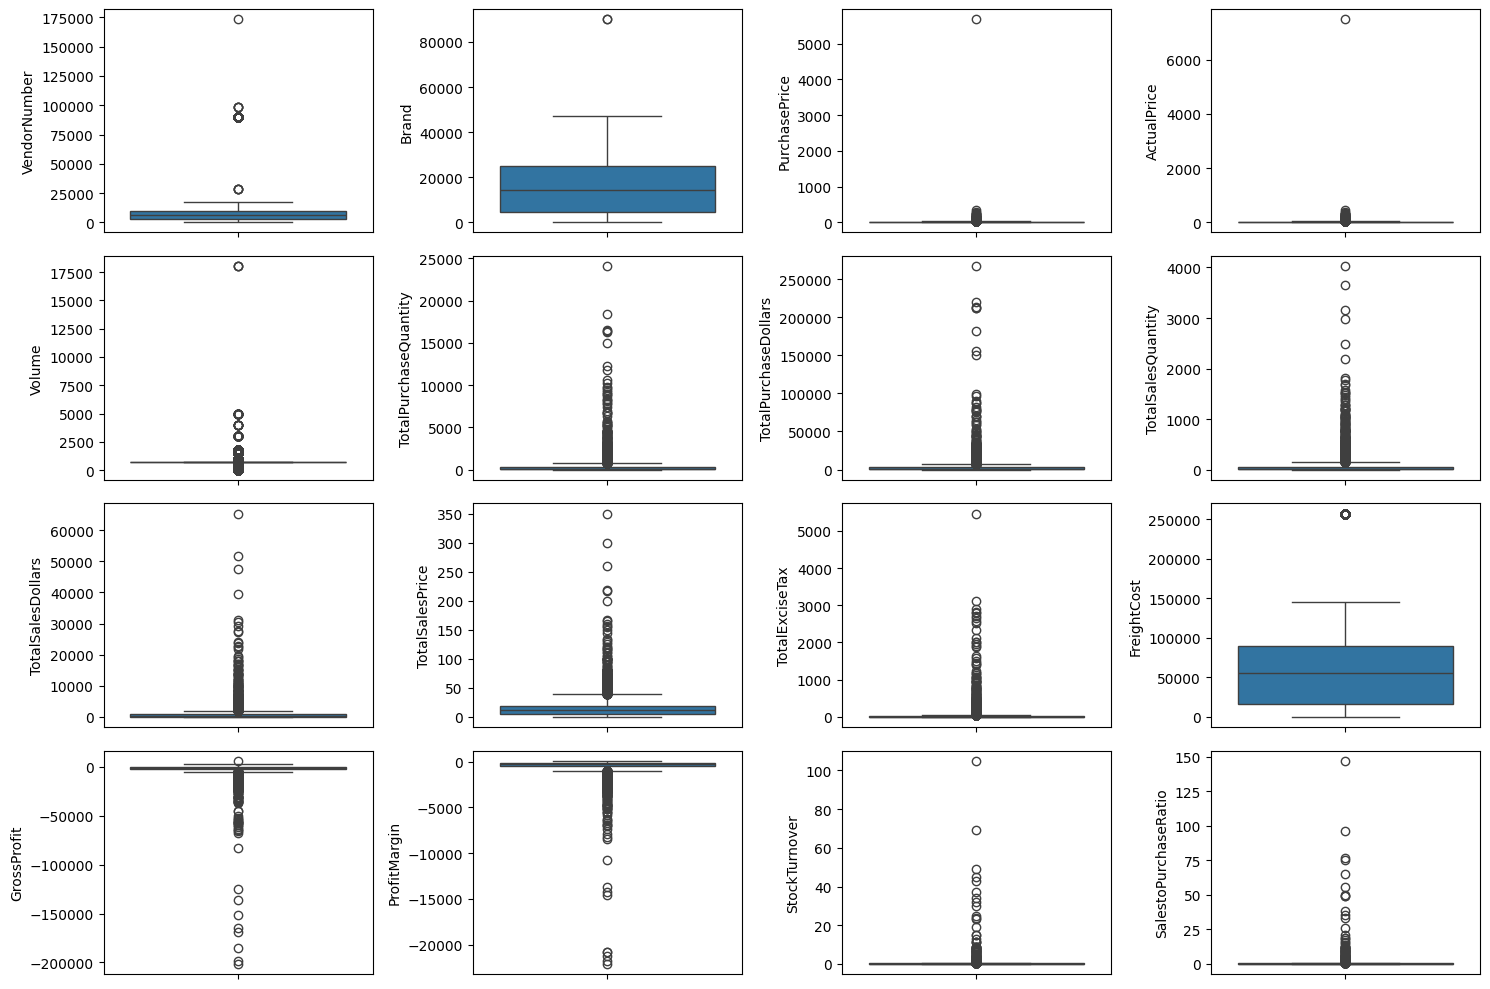

In [34]:
numericalcols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numericalcols):
  plt.subplot(4,4,i+1)
  sns.boxplot(y = df[col])
  # plt.title(col)
plt.tight_layout()
plt.show()

In [35]:
df = pd.read_sql_query(
    """
    select * from vendor_sale_summary
    where grossprofit > 0
    and profitmargin > 0
    and TotalSalesQuantity > 0


    """

,conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,17035.0,PERNOD RICARD USA,2645.0,Chivas Regal,21.89,31.99,750.0,155.0,3392.95,114.0,3624.86,31.780698,89.90,123780.22,231.91,6.397764,0.735484,1.068351
1,8673.0,STE MICHELLE WINE ESTATES,42764.0,14 Hands Cab Svgn Wash,6.09,8.95,750.0,518.0,3154.62,300.0,3429.80,11.539630,33.52,15919.70,275.18,8.023208,0.579151,1.087231
2,4425.0,MARTIGNETTI COMPANIES,26383.0,Buehler Chard RRV,7.89,15.99,750.0,375.0,2958.75,357.0,4280.43,11.990000,39.92,144929.24,1321.68,30.877272,0.952000,1.446702
3,4425.0,MARTIGNETTI COMPANIES,36648.0,Groth Cab Svgn Napa,39.18,59.99,750.0,64.0,2507.52,50.0,2995.50,59.808182,5.59,144929.24,487.98,16.290436,0.781250,1.194607
4,480.0,BACARDI USA INC,4881.0,Bacardi Twin Pack 2/750mls,14.81,19.99,750.0,159.0,2354.79,144.0,2878.56,19.990000,113.44,89286.27,523.77,18.195556,0.905660,1.222427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1392.0,CONSTELLATION BRANDS INC,24587.0,Woodbridge Harvest Spice Red,4.51,6.99,750.0,1.0,4.51,7.0,53.93,7.704286,0.77,79528.99,49.42,91.637308,7.000000,11.957871
290,3960.0,DIAGEO NORTH AMERICA INC,3707.0,Smirnoff Ruby Red Grapefruit,0.74,0.99,50.0,5.0,3.70,5.0,4.95,0.990000,0.25,257032.07,1.25,25.252525,1.000000,1.337838
291,3960.0,DIAGEO NORTH AMERICA INC,4751.0,Capt Morgan Cannon Blast,0.72,0.99,50.0,3.0,2.16,45.0,44.55,0.990000,2.32,257032.07,42.39,95.151515,15.000000,20.625000
292,3252.0,E & J GALLO WINERY,7404.0,New Amsterdam Mango Vodka,0.77,0.99,50.0,2.0,1.54,60.0,59.40,0.990000,3.08,61966.91,57.86,97.407407,30.000000,38.571429


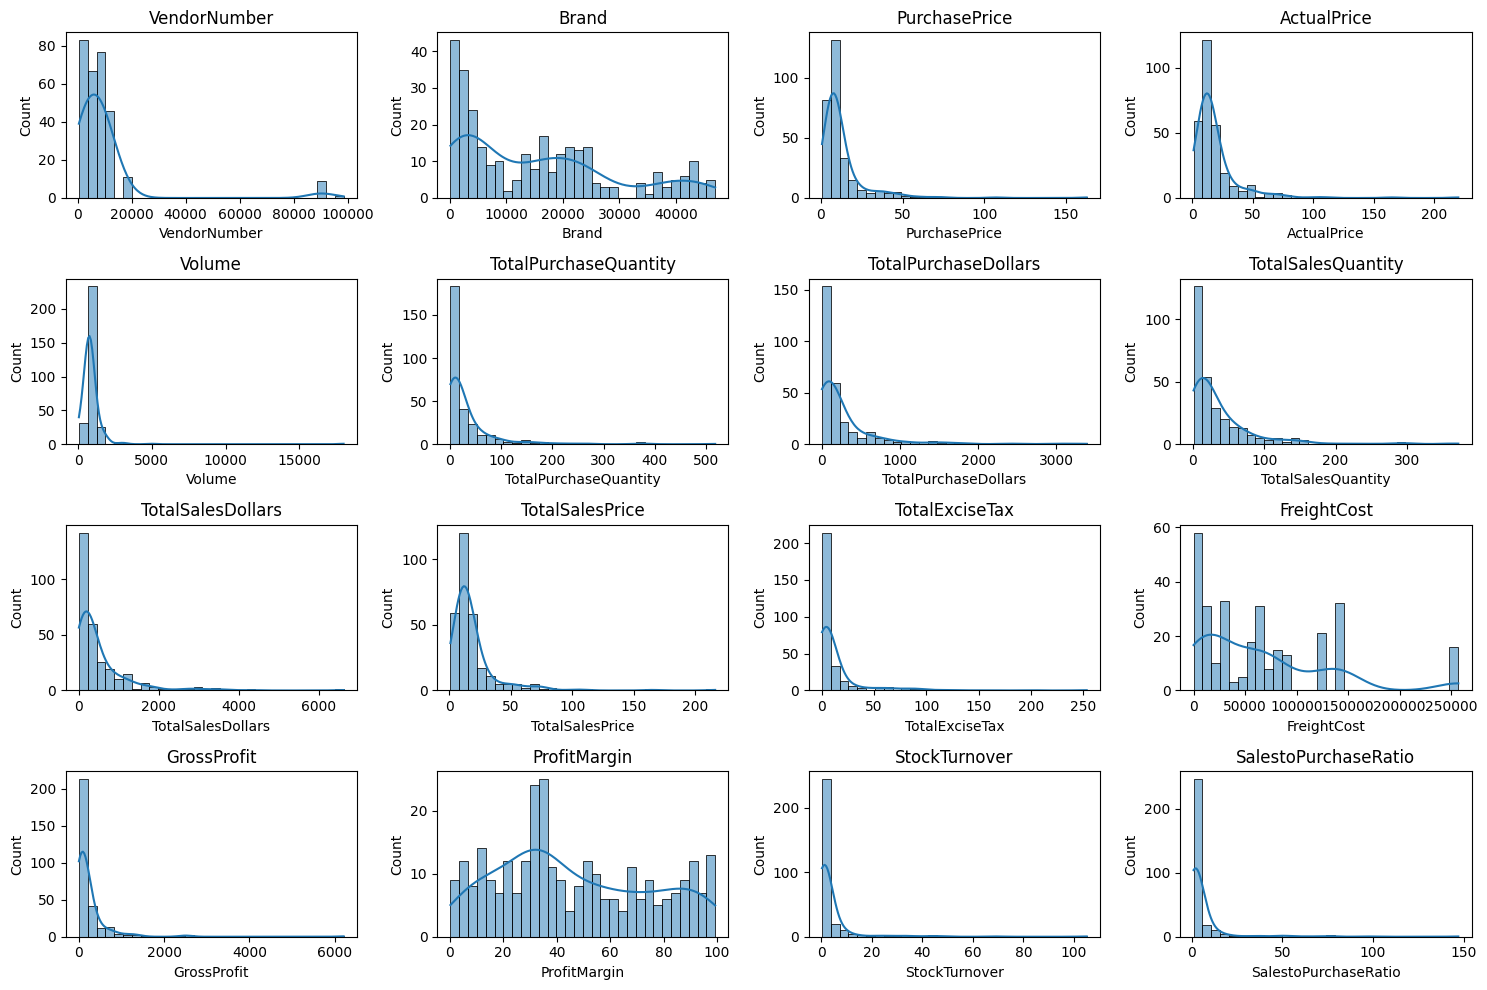

In [36]:
numericalcols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numericalcols):
  plt.subplot(4,4,i+1)
  sns.histplot(df[col],kde=True,bins=30)
  plt.title(col)
plt.tight_layout()
plt.show()

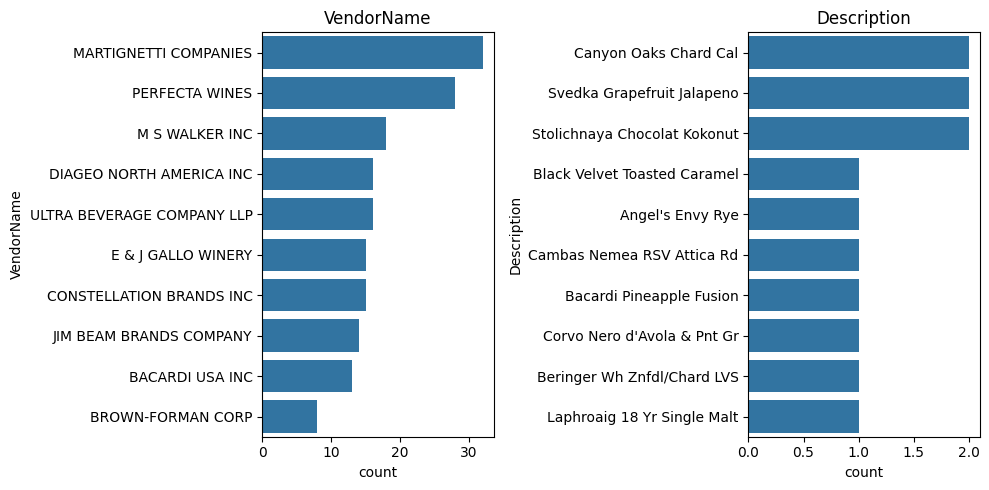

In [37]:
categoricalcols = ['VendorName',"Description"]

plt.figure(figsize=(10,5))
for i,col in enumerate(categoricalcols):
  plt.subplot(1,2,i+1)
  sns.countplot(y=df[col],order = df[col].value_counts().index[:10])
  plt.title(col)
plt.tight_layout()
plt.show()

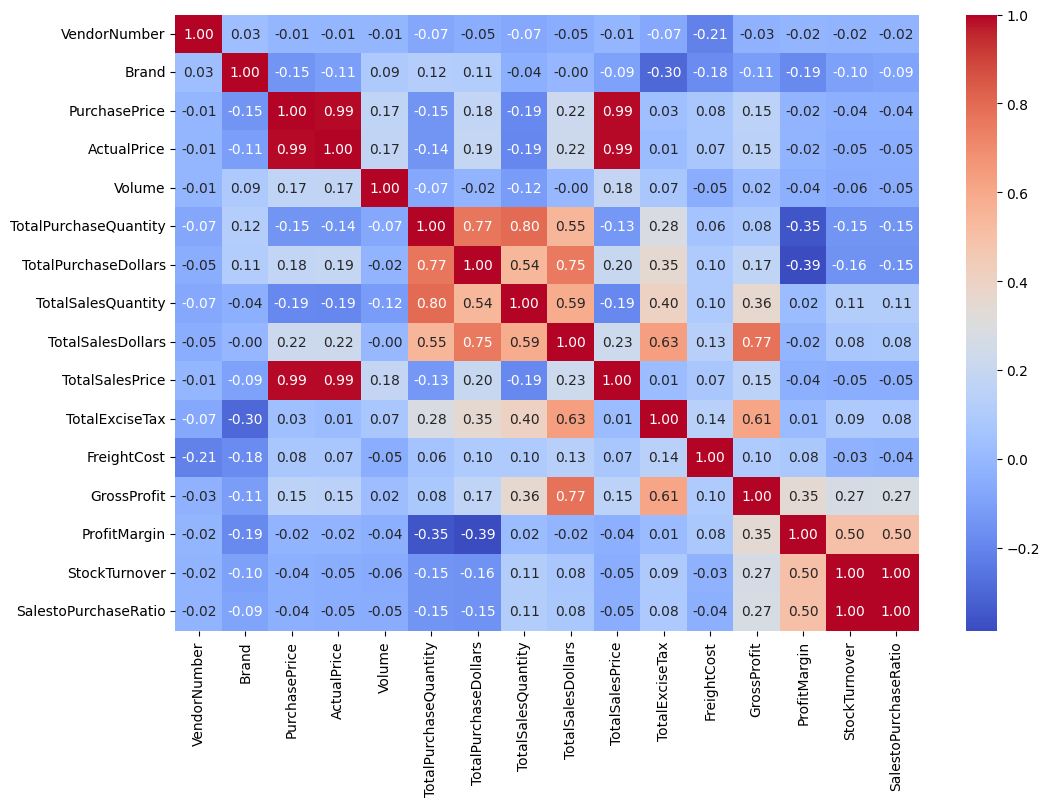

In [38]:
plt.figure(figsize= (12,8))
correlationmatrix  = df[numericalcols].corr()
sns.heatmap(correlationmatrix,annot=True,cmap='coolwarm',fmt = '.2f')
plt.show()

**data analysis**

* identify brands that need promotional or pricing adjustments which exhibit lower sales performance but higher profit margins


In [40]:
brandperformance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

In [41]:
low_sales_threshold = brandperformance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brandperformance['ProfitMargin'].quantile(0.85)


In [42]:
print(low_sales_threshold)


74.67000000000002


In [43]:
print(high_margin_threshold)

83.24782842151771


In [44]:
targetbrands = brandperformance[
    (brandperformance['TotalSalesDollars'] <= low_sales_threshold) &
    (brandperformance['ProfitMargin'] >= high_margin_threshold)
]
display(targetbrands.sort_values('TotalSalesDollars'))

,Description,TotalSalesDollars,ProfitMargin
164,McCormick Gin,36.45,85.706447
54,Capt Morgan Cannon Blast,44.55,95.151515
287,Woodbridge Harvest Spice Red,53.93,91.637308
178,New Amsterdam Mango Vodka,59.40,97.407407


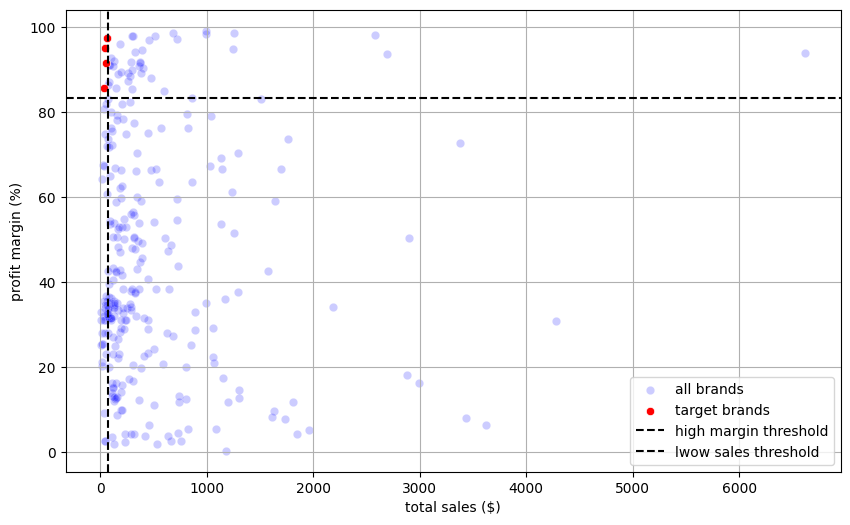

In [45]:
plt.figure(figsize= (10,6))
sns.scatterplot(data = brandperformance,x = 'TotalSalesDollars',y='ProfitMargin',color = 'blue',label="all brands",alpha = 0.2)
sns.scatterplot(data = targetbrands,x = 'TotalSalesDollars',y='ProfitMargin',color = 'red',label="target brands")
plt.axhline(high_margin_threshold,linestyle = '--',color = 'black',label = 'high margin threshold')
plt.axvline(low_sales_threshold,linestyle = '--',color = 'black',label = 'lwow sales threshold')

plt.xlabel('total sales ($)')
plt.ylabel('profit margin (%)')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
top_vendors = df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)
top_vendors


,TotalSalesDollars
VendorName,
MARTIGNETTI COMPANIES,22917.02
DIAGEO NORTH AMERICA INC,12519.20
PERFECTA WINES,11874.32
BROWN-FORMAN CORP,8892.89
BACARDI USA INC,8596.29
M S WALKER INC,8294.28
STE MICHELLE WINE ESTATES,6542.82
PERNOD RICARD USA,6235.85
MOET HENNESSY USA INC,6018.25


In [47]:
top_brands

,TotalSalesDollars
Description,
Ciroc Apple Vodka,6622.62
Buehler Chard RRV,4280.43
Chivas Regal,3624.86
14 Hands Cab Svgn Wash,3429.80
Hennessey VS +VSOP 50mL,3378.83
Groth Cab Svgn Napa,2995.50
Clean Slate Rsl Mosel,2895.03
Bacardi Twin Pack 2/750mls,2878.56
Jack Daniels Bruins Glass Pk,2695.10


In [48]:
def formatdollars(value):
  if value >= 1_000_000:
    return f"{value / 1_000_000:.2f}M"
  elif value >= 1_000:
    return f"{value / 1_00:.2f}K"
  else:
   return str(value)

In [49]:
top_brands.apply(lambda x: formatdollars(x))

,TotalSalesDollars
Description,
Ciroc Apple Vodka,66.23K
Buehler Chard RRV,42.80K
Chivas Regal,36.25K
14 Hands Cab Svgn Wash,34.30K
Hennessey VS +VSOP 50mL,33.79K
Groth Cab Svgn Napa,29.95K
Clean Slate Rsl Mosel,28.95K
Bacardi Twin Pack 2/750mls,28.79K
Jack Daniels Bruins Glass Pk,26.95K


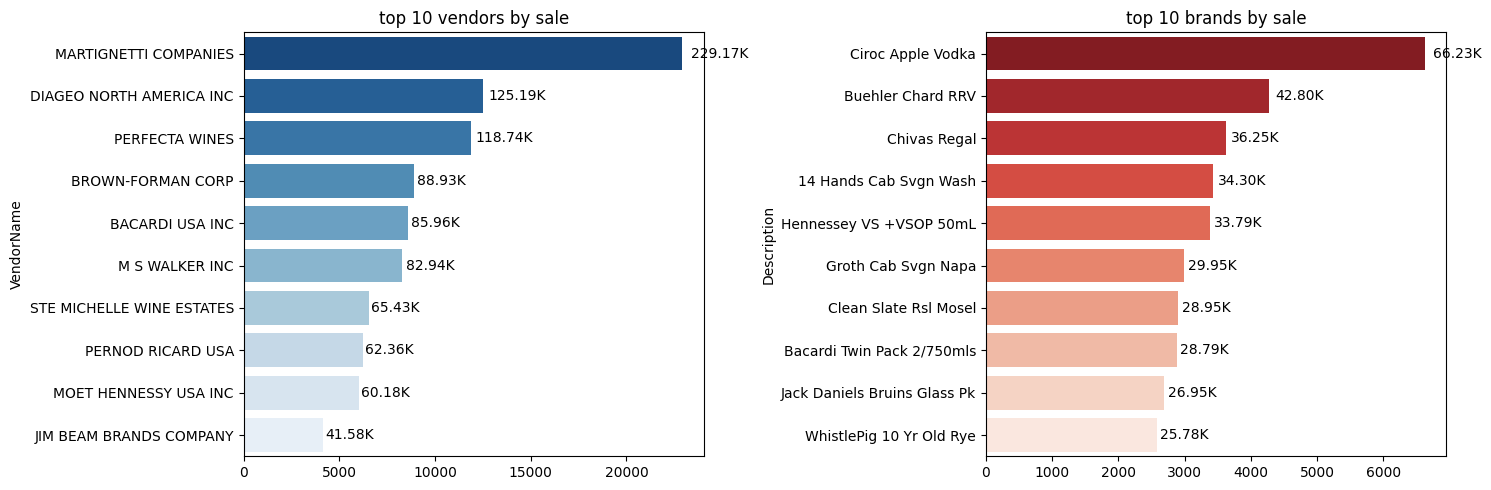

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax1 = sns.barplot(y = top_vendors.index, x = top_vendors.values , palette="Blues_r")
plt.title("top 10 vendors by sale")

for bar in ax1.patches:
  ax1.text(bar.get_width()+(bar.get_width() *0.02 ),
  bar.get_y() + bar.get_height() / 2,
           formatdollars(bar.get_width()),
           ha = 'left' , va ='center',fontsize = 10,color='black'
           )
plt.subplot(1,2,2)
ax2 = sns.barplot(y = top_brands.index.astype(str), x = top_brands.values , palette="Reds_r")
plt.title("top 10 brands by sale")



for bar in ax2.patches:
  ax2.text(bar.get_width()+(bar.get_width() *0.02 ),
  bar.get_y() + bar.get_height() / 2,
          formatdollars(bar.get_width()),
          ha = 'left' , va ='center',fontsize = 10,color='black')
plt.tight_layout()
plt.show()



 **which vendors contributed most to the total purchase dollars**

In [52]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    "TotalSalesDollars":'sum'
}).reset_index()

In [53]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()

In [54]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [55]:
numericalcols = vendor_performance.select_dtypes(include=np.number).columns
# vendor_performance = vendor_performance[numericalcols].select_dtypes(include = np.number)

In [56]:
top_vendors  = vendor_performance.head(10)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(formatdollars)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(formatdollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(formatdollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,MARTIGNETTI COMPANIES,160.92K,68.25K,229.17K,0.20
23,M S WALKER INC,60.76K,22.19K,82.94K,0.08
30,PERFECTA WINES,54.10K,64.64K,118.74K,0.07
40,STE MICHELLE WINE ESTATES,50.63K,14.80K,65.43K,0.06
0,BACARDI USA INC,47.76K,38.21K,85.96K,0.06
31,PERNOD RICARD USA,46.86K,15.50K,62.36K,0.06
9,DIAGEO NORTH AMERICA INC,41.05K,84.15K,125.19K,0.05
28,MOET HENNESSY USA INC,27.84K,32.34K,60.18K,0.03
17,JIM BEAM BRANDS COMPANY,27.75K,13.83K,41.58K,0.03
12,E & J GALLO WINERY,27.14K,12.60K,39.74K,0.03


In [57]:
vendor_performance['PurchaseContribution%']= vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

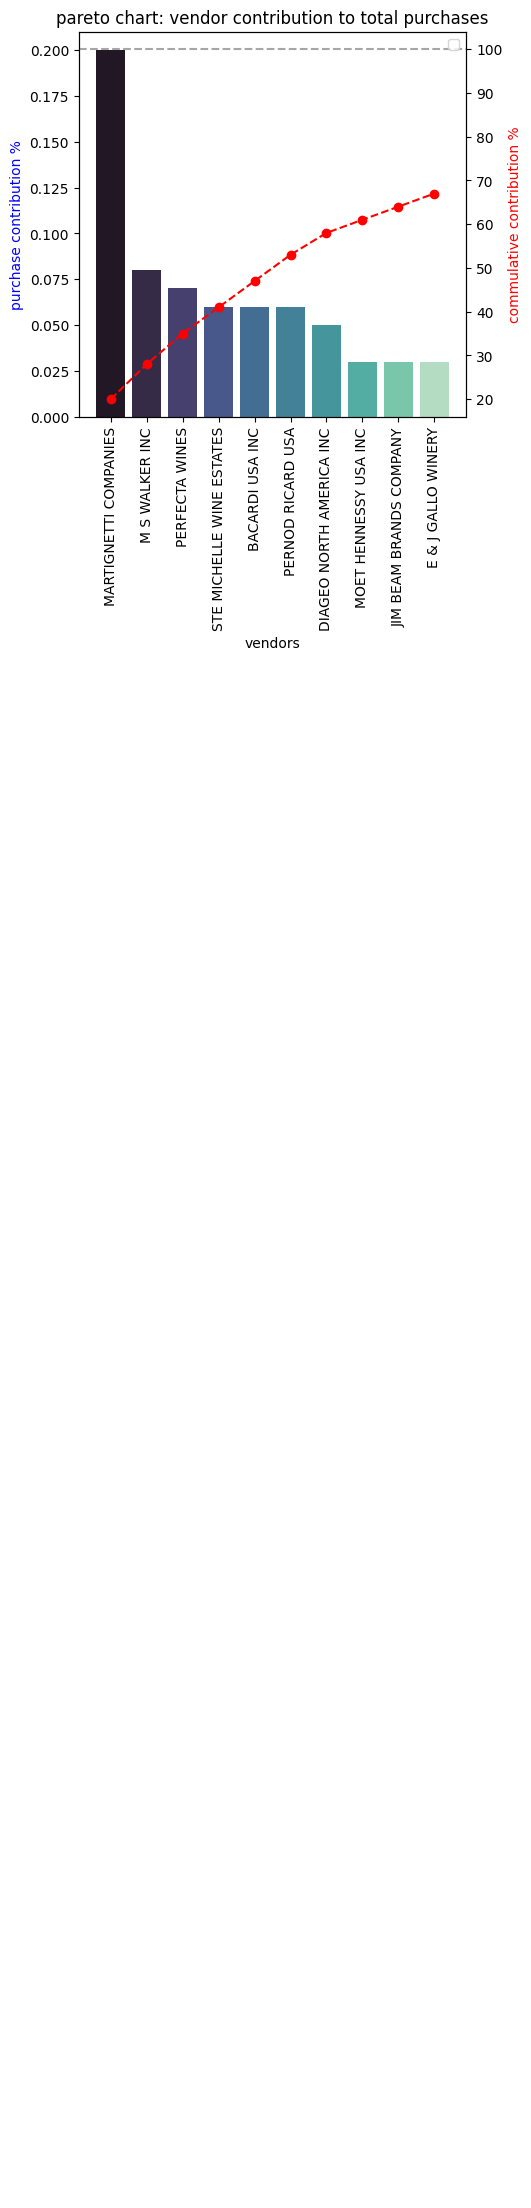

In [61]:
top_vendors['Commulative_Contributions'] = top_vendors['PurchaseContribution%'].cumsum()*100
fig,ax1 = plt.subplots(figsize=(5,5))

sns.barplot( x = top_vendors['VendorName'],y= top_vendors['PurchaseContribution%'],palette= "mako",ax =ax1 )

for i,value in enumerate(top_vendors['PurchaseContribution%']):
  ax1.text(i,value-1,str(value)+'%',ha='center',color='white',fontsize=10)
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['Commulative_Contributions'],color= 'red',marker = 'o',linestyle = 'dashed')

ax1.set_xticklabels(top_vendors['VendorName'],rotation = 90)
ax1.set_ylabel('purchase contribution %',color='blue')
ax2.set_ylabel('commulative contribution %',color='red')
ax1.set_xlabel('vendors')
ax1.set_title("pareto chart: vendor contribution to total purchases")


ax2.axhline(y=100,color="gray",linestyle = "dashed",alpha=0.7)
ax2.legend(loc='upper right')
plt.show()

In [63]:
print(f"total purchase contributions of top 10 vendors is {round( top_vendors['PurchaseContribution%'].sum(),2)}")

total purchase contributions of top 10 vendors is 0.67


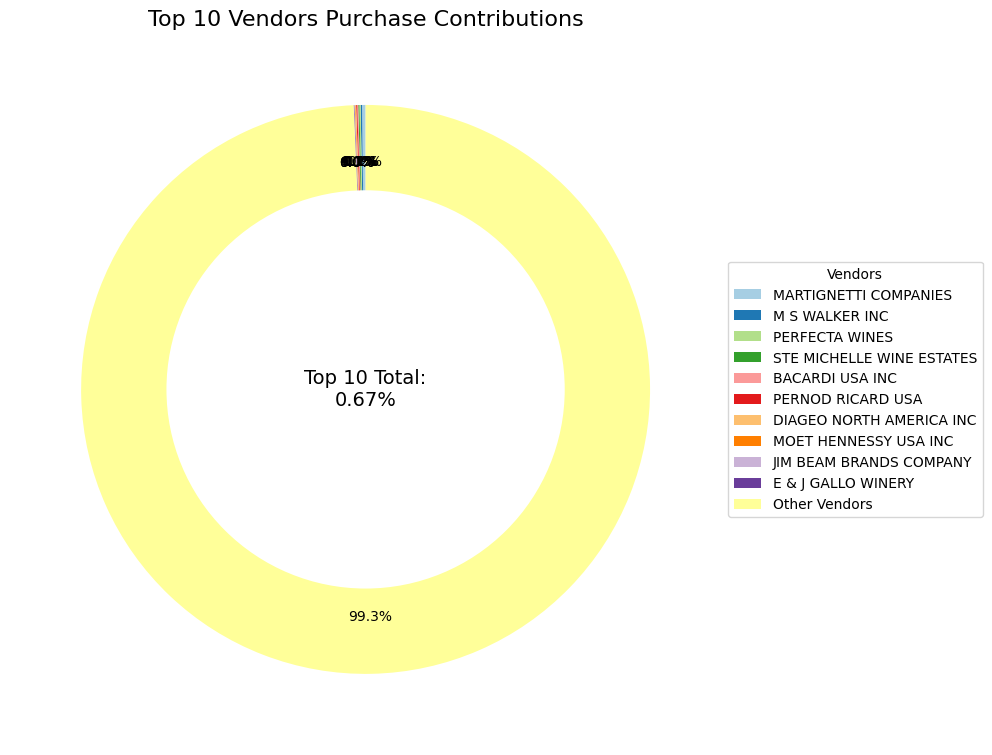

In [65]:
import matplotlib.pyplot as plt

vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

fig, ax = plt.subplots(figsize=(10, 10))

wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8,
    colors=plt.cm.Paired.colors,
    textprops=dict(color="black")
)

# Add center circle for donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Title in center of donut
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", ha='center', va='center', fontsize=14)

# Add legend on the right
ax.legend(wedges, vendors, title="Vendors", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Top 10 Vendors Purchase Contributions', fontsize=16)
plt.tight_layout()
plt.show()


In [66]:
df['unitpurchaseprice'] = df['TotalPurchaseDollars']/ df['TotalPurchaseQuantity']

In [67]:
df['ordersize'] = pd.qcut(df['TotalPurchaseQuantity'],q=3,labels = ["small","medium","large"])

In [68]:
df.groupby('ordersize')[['unitpurchaseprice']].mean()

,unitpurchaseprice
ordersize,
small,18.563100
medium,9.929018
large,9.526341


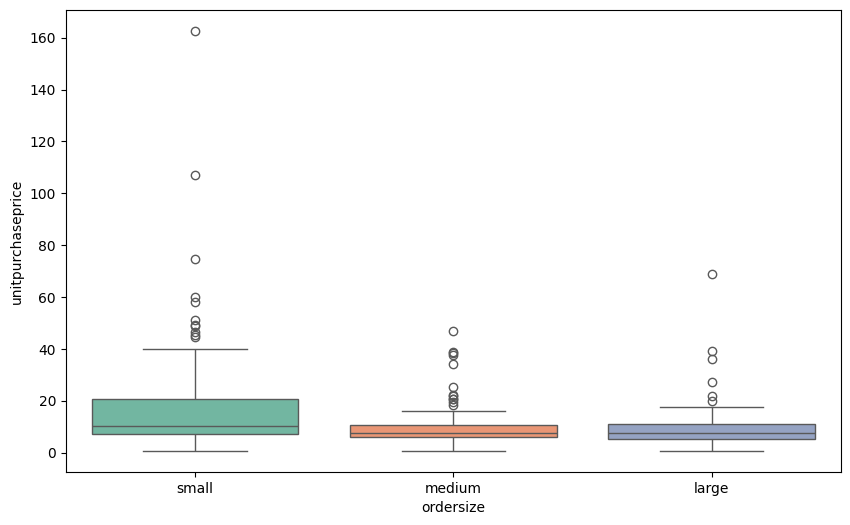

In [69]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x= 'ordersize',y='unitpurchaseprice',palette="Set2")
plt.show(

)

In [72]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values("StockTurnover",ascending = True)

,StockTurnover
VendorName,
VINEYARD BRANDS INC,0.541985
DELICATO VINEYARDS INC,0.623529
M S WALKER INC,0.650247
Dunn Wine Brokers,0.666667
TREASURY WINE ESTATES,0.722917
BANFI PRODUCTS CORP,0.722988
E & J GALLO WINERY,0.723856
SEA BREEZE CELLARS LLC,0.726316
MOET HENNESSY USA INC,0.727273


In [73]:
df['unsoldinventoryvalue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
df['unsoldinventoryvalue'].sum()

np.float64(-16750.28)

In [74]:
inventory_value_per_vendor = df.groupby("VendorName")['unsoldinventoryvalue'].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='unsoldinventoryvalue',ascending= False)
inventory_value_per_vendor.head()

,VendorName,unsoldinventoryvalue
25,MARTIGNETTI COMPANIES,1865.52
40,STE MICHELLE WINE ESTATES,1339.64
23,M S WALKER INC,979.57
31,PERNOD RICARD USA,502.54
12,E & J GALLO WINERY,286.42


In [75]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [78]:
top_vendors = df[df['TotalSalesDollars']>= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars']<= low_threshold]['ProfitMargin'].dropna()

In [79]:
top_vendors

,ProfitMargin
0,6.397764
1,8.023208
2,30.877272
3,16.290436
4,18.195556
...,...
249,97.184234
258,98.694043
260,98.466980
275,98.675439


In [80]:
low_vendors

,ProfitMargin
148,3.397315
151,15.043362
157,13.084622
159,13.928274
161,16.134316
...,...
289,91.637308
290,25.252525
291,95.151515
292,97.407407


In [81]:
def confidence_interval(data,confidence = 0.95):
  meanval = np.mean(data)
  std_err = np.std(data,ddof=1)/ np.sqrt(len(data))
  t_critical = stats.t.ppf((1+confidence) /2, df= len(data)-1 )
  margin_of_error= t_critical * std_err
  return round(meanval,2),round(meanval,2) - round(margin_of_error,2),round(meanval,2) + round(margin_of_error,2)

top vendors 95% ci: ( 35.739999999999995,50.42 , top mean :43.08 )
low vendors 95% ci: ( 40.94,53.56 , low mean :47.25 )


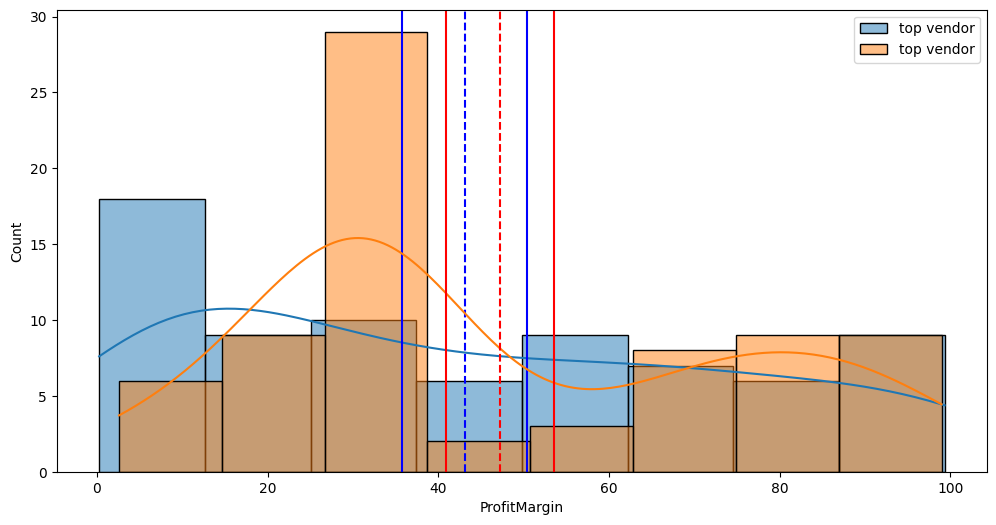

In [82]:
top_mean,top_lower,top_upper = confidence_interval(top_vendors)
low_mean,low_lower,low_upper = confidence_interval(low_vendors)


print(f"top vendors 95% ci: ( {top_lower},{top_upper} , top mean :{top_mean} )")
print(f"low vendors 95% ci: ( {low_lower},{low_upper} , low mean :{low_mean} )")


plt.figure(figsize=(12,6))


sns.histplot(top_vendors ,kde = True, label = "top vendor")
plt.axvline(top_lower,color='blue')
plt.axvline(top_upper,color='blue')
plt.axvline(top_mean,color='blue',linestyle = '--')


sns.histplot(low_vendors ,kde = True, label = "top vendor")
plt.axvline(low_lower,color='red')
plt.axvline(low_upper,color='red')
plt.axvline(low_mean,color='red',linestyle = '--')

plt.legend()
plt.show()